In [1]:
import warnings
warnings.filterwarnings('ignore')

from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from sklearn.datasets import fetch_20newsgroups

newsgroup_train=fetch_20newsgroups(subset='train',shuffle=True)
newsgroup_test = fetch_20newsgroups(subset='test',shuffle=True)

In [2]:
newsgroup_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
stemmer=SnowballStemmer('english')
np.random.seed(400)

In [4]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
    return result

In [5]:
processed_docs=[]
for doc in newsgroup_train.data:
     x=preprocess(doc)
     x=' '.join(x)
     processed_docs.append(x)
        
print(processed_docs[2])

twilli purdu thoma willi subject question organ purdu univers engin network distribut line folk plus final give ghost weekend start life sooo market machin sooner intend look pick powerbook mayb bunch question hope somebodi answer anybodi know dirt round powerbook introduct expect hear suppos appear summer haven hear anymor access macleak wonder anybodi info anybodi hear rumor price drop powerbook line like one go recent impress display probabl swing disk feel better display look great store good solicit opinion peopl worth take disk size money activ display realiz real subject question play machin store breifli figur opinion somebodi actual use machin daili prove help hellcat perform thank bunch advanc info email post summari news read time premium final corner willi twilli purdu purdu electr engin convict danger enemi truth lie nietzsch


In [24]:
print(processed_docs[0])

lerxst thing subject nntp post host organ univers maryland colleg park line wonder enlighten door sport look late earli call bricklin door small addit bumper separ rest bodi know tellm model engin spec year product histori info funki look mail thank bring neighborhood lerxst


In [25]:
x=process.extract(processed_docs[0],newsgroup_train.target_names)
x

[('rec.sport.baseball', 57),
 ('rec.sport.hockey', 57),
 ('comp.windows.x', 26),
 ('sci.crypt', 26),
 ('soc.religion.christian', 25)]

In [7]:
len(processed_docs)

11314

In [8]:
group=[]
for doc in processed_docs:
    article_cat=[]
    x=process.extract(doc,newsgroup_train.target_names)
    cls_name=x.pop(0)[0]
    article_cat.append(doc)
    article_cat.append(cls_name)
    group.append(article_cat)

In [9]:
len(group)

11314

In [10]:
df = pd.DataFrame(group, columns=['Article', 'Categories']) 

In [11]:
df.head()

,Article,Categories
0,lerxst thing subject nntp post host organ univ...,rec.sport.baseball
1,guykuo carson washington subject clock poll fi...,rec.sport.baseball
2,twilli purdu thoma willi subject question orga...,alt.atheism
3,jgreen amber green subject weitek organ harri ...,comp.windows.x
4,head harvard jonathan mcdowel subject shuttl l...,misc.forsale


In [12]:
df.shape

(11314, 2)

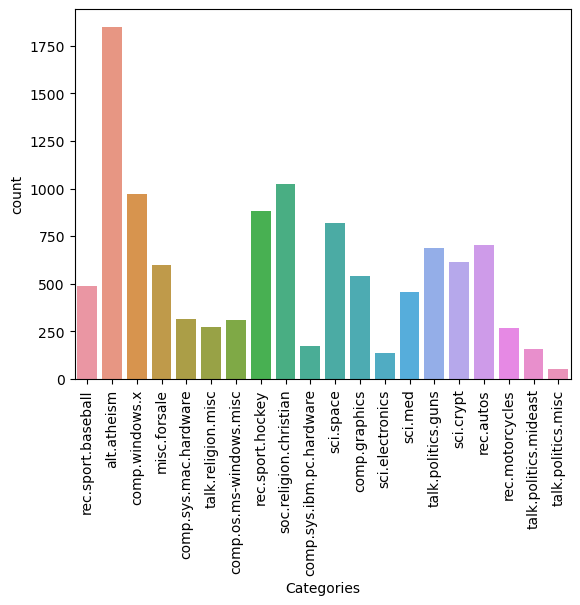

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='Categories', data = df)
plt.xticks(rotation=90)
plt.show()
